# Import Libraries The libraries can be imported using the import keyword.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.feature_selection import *
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.svm import *
from sklearn.preprocessing import LabelEncoder
import pickle
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
mpl.style.use('ggplot')

# To read the datasets

In [53]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='CZbc100svxJzq8WBN2nvoA1Sf5BxBIRplLC87GoklIxg',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'carresalevaluepredictionpnt2022tm-donotdelete-pr-jspas9i5mcihyl'
object_key = 'Datasets_of_cars.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Car_names,Brands,year,Price,kms_driven,fuel_type
0,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
1,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel


In [54]:
data.shape

(891, 6)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Car_names   891 non-null    object
 1   Brands      891 non-null    object
 2   year        891 non-null    object
 3   Price       891 non-null    object
 4   kms_driven  839 non-null    object
 5   fuel_type   836 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


#### Backup copy

In [56]:
backup=data.copy()

## The problems identify in datasets
- names are pretty inconsistent
- names have company names attached to it
- some names are spam
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

In [57]:
data['year'].unique()

array(['2006', '2018', '2014', '2015', '2012', '2013', '2016', '2010',
       '2007', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [58]:
data['Price'].unique()

array(['4,25,000', 'Ask For Price', '3,25,000', '5,75,000', '1,75,000',
       '1,90,000', '8,30,000', '2,50,000', '1,82,000', '3,15,000',
       '4,15,000', '3,20,000', '80,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [59]:
data['kms_driven'].unique()

array(['40 kms', '22,000 kms', '28,000 kms', '36,000 kms', '59,000 kms',
       '41,000 kms', '25,000 kms', '24,530 kms', '60,000 kms',
       '30,000 kms', '32,000 kms', '48,660 kms', '45,000 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [60]:
data['fuel_type'].unique()

array(['Diesel', 'Petrol', nan, 'LPG'], dtype=object)

In [61]:
data['Car_names'].unique()

array(['Mahindra Jeep CL550 MDI', 'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV',
       'Hyundai Santro Xing XO eRLX Euro III', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

# Now is to clean the datasets 

In [62]:
## year has many non-year values
data=data[data['year'].str.isnumeric()]

In [63]:
## year is in object. Change to integer
data['year']=data['year'].astype(int)

In [64]:
## Price has Ask for Price
data=data[data['Price']!='Ask For Price']

In [65]:
## Price has commas in its prices and is in object
data['Price']=data['Price'].str.replace(',','').astype(int)

In [66]:
## kms_driven has object values with kms at last
data['kms_driven']=data['kms_driven'].str.split().str.get(0).str.replace(',','')

In [67]:
## It has nan values and two rows have 'Petrol' in them
data=data[data['kms_driven'].str.isnumeric()]
data['kms_driven']=data['kms_driven'].astype(int)

In [68]:
## fuel_type has nan values
data=data[~data['fuel_type'].isna()]
data.shape

(815, 6)

In [69]:
## name and company had spammed data...but with the previous cleaning, those rows got removed.

### Company does not need any cleaning now. Changing car names. Keeping only the first three words
data['Car_names']=data['Car_names'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [70]:
## Resetting the index of the final cleaned data
data=data.reset_index(drop=True)

# Now the cleaned data is:

In [71]:
data

,Car_names,Brands,year,Price,kms_driven,fuel_type
0,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
1,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
2,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
3,Ford Figo,Ford,2012,175000,41000,Diesel
4,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [72]:
data.to_csv('Cleaned_datasets.csv')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Car_names   815 non-null    object
 1   Brands      815 non-null    object
 2   year        815 non-null    int64 
 3   Price       815 non-null    int64 
 4   kms_driven  815 non-null    int64 
 5   fuel_type   815 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.3+ KB


In [74]:
data.describe()

,year,Price,kms_driven
count,815.000000,8.150000e+02,815.000000
mean,2012.451534,4.121246e+05,46277.096933
std,4.000896,4.753339e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.925000e+05,56879.000000
max,2019.000000,8.500003e+06,400000.000000


# data preprocessing

## Visualization

In [75]:
data['Brands'].unique()

array(['Mahindra', 'Hyundai', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'kms_driven'}>, <AxesSubplot:>]],
      dtype=object)

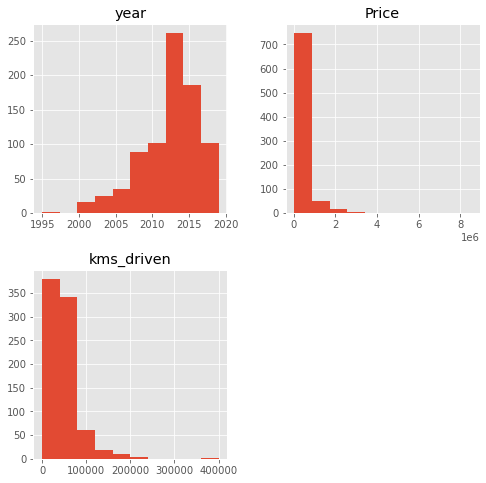

In [76]:
data.hist(figsize=(8,8))

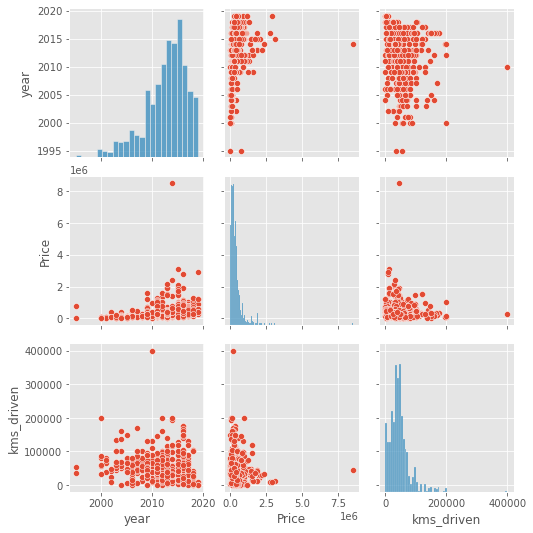

In [77]:
sns.pairplot(data)

<AxesSubplot:xlabel='Price'>

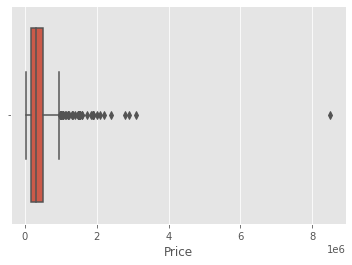

In [78]:
sns.boxplot(data.Price)

# Extracting Training Data

In [79]:
X=data[['Car_names','Brands','year','kms_driven','fuel_type']]
y=data['Price']

In [80]:
X

,Car_names,Brands,year,kms_driven,fuel_type
0,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
1,Hyundai Grand i10,Hyundai,2014,28000,Petrol
2,Ford EcoSport Titanium,Ford,2014,36000,Diesel
3,Ford Figo,Ford,2012,41000,Diesel
4,Hyundai Eon,Hyundai,2013,25000,Petrol
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [81]:
y.shape

(815,)

# Encoding Techniques 

## 1.label encoding

In [82]:
le=LabelEncoder()

In [83]:
data.year=le.fit_transform(data.year)
data.Price=le.fit_transform(data.Price)

In [84]:
data.head()

,Car_names,Brands,year,Price,kms_driven,fuel_type
0,Mahindra Jeep CL550,Mahindra,7,151,40,Diesel
1,Hyundai Grand i10,Hyundai,15,116,28000,Petrol
2,Ford EcoSport Titanium,Ford,15,195,36000,Diesel
3,Ford Figo,Ford,13,61,41000,Diesel
4,Hyundai Eon,Hyundai,14,72,25000,Petrol


## 2.One hot encoding

<AxesSubplot:>

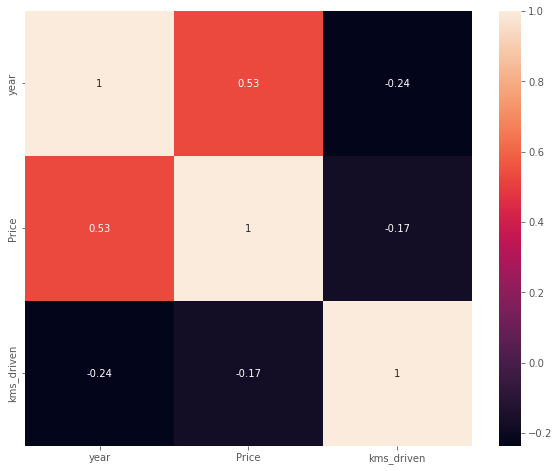

In [85]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

# X and y split

In [86]:
# dependent variable

y=data['Price']
y

0      151
1      116
2      195
3       61
4       72
      ... 
810     98
811     36
812    110
813     95
814    138
Name: Price, Length: 815, dtype: int64

In [87]:
#independent variable

X=data.drop(columns=['Price'],axis=1)
X.head()

,Car_names,Brands,year,kms_driven,fuel_type
0,Mahindra Jeep CL550,Mahindra,7,40,Diesel
1,Hyundai Grand i10,Hyundai,15,28000,Petrol
2,Ford EcoSport Titanium,Ford,15,36000,Diesel
3,Ford Figo,Ford,13,41000,Diesel
4,Hyundai Eon,Hyundai,14,25000,Petrol


# Train test split

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [89]:
X_train.shape

(652, 5)

In [90]:
y_train.shape

(652,)

In [91]:
X_test.shape

(163, 5)

In [92]:
y_test.shape

(163,)

# Model building

In [93]:
X = data.drop(columns='Price')
y = data['Price']

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [96]:
ohe=OneHotEncoder()
ohe.fit(X[['Car_names','Brands','fuel_type']])

OneHotEncoder()

In [97]:
# Creating a column transformer to transform categorical columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Car_names','Brands','fuel_type']),
                                    remainder='passthrough')

In [98]:
# Linear Regression model
lR=LinearRegression()

In [99]:
# Making a pipeline
pipe=make_pipeline(column_trans,lR)

In [100]:
# Fitting the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [101]:
y_pred=pipe.predict(X_test)

In [102]:
r2_score(y_test,y_pred)

0.8237535399069041

In [103]:
# Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.90 as r2_score
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [104]:
np.argmax(scores)

695

In [105]:
scores[np.argmax(scores)]

0.9013820624340118

In [106]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([13165.39344547])

# The best model is found at a certain random state

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9013820624340118

In [108]:
# Now, already import pickle so import linearregression.pkl file
# Savin the Model to a Pickle File
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [109]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([13057.00211854])

In [111]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

In [112]:
pip install -U ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [113]:
from ibm_watson_machine_learning import APIClient
import json

In [114]:
wml_credentials = {
    "apikey":"SvFZ1utanucs0TZzlpy_2eM6I8WWpT7BXpM2tOhBiCA2",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [116]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------  ------------------------
ID                                    NAME     CREATED
293f5305-63e1-4855-9258-4cb8fd0d2ebf  crsvpds  2022-11-17T05:02:16.460Z
------------------------------------  -------  ------------------------


In [117]:
SPACE_ID = "293f5305-63e1-4855-9258-4cb8fd0d2ebf"

In [118]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [119]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [120]:
import sklearn
sklearn.__version__

'1.0.2'

In [122]:
MODEL_NAME = "Car_Resale_value_Prediction-PNT2022TMID08862"
DEPLOYMENT_NAME = "crsvpds"
DEMO_MODEL = pipe

In [123]:
#Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [124]:
# Setup model
model_props ={
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid 
}


In [125]:
model_details=wml_client.repository.store_model(
     model=DEMO_MODEL,
     meta_props=model_props,
     training_data=X_train,
     training_target=y_train
)

In [126]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Price',
  'schemas': {'input': [{'fields': [{'name': 'Car_names', 'type': 'object'},
      {'name': 'Brands', 'type': 'object'},
      {'name': 'year', 'type': 'int64'},
      {'name': 'kms_driven', 'type': 'int64'},
      {'name': 'fuel_type', 'type': 'object'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-17T05:06:34.817Z',
  'id': '69128d35-bad6-454b-b01b-82af247a4ec3',
  'modified_at': '2022-11-17T05:06:38.137Z',
  'name': 'Car_Resale_value_Prediction-PNT2022TMID08862',
  'owner': 'IBMid-667000BSQ6',
  'resource_key': '3414743d-0879-4061-8673-5daafa5356f0',
  'space_id': '293f5305-63e1-4855-9258-4cb8fd0d2ebf'},
 'system': {'warnings': []}}

In [127]:
model_id=wml_client.repository.get_model_id(model_details)
model_id

'69128d35-bad6-454b-b01b-82af247a4ec3'

In [128]:
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [129]:
deployment=wml_client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '69128d35-bad6-454b-b01b-82af247a4ec3' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='3d15cfbe-4005-4b16-a0e4-2b356ba00b60'
------------------------------------------------------------------------------------------------




In [13]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "SvFZ1utanucs0TZzlpy_2eM6I8WWpT7BXpM2tOhBiCA2"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"fields": ['Car_names', 'Brands', 'year', 'kms_driven', 'fuel_type'], "values": [['Maruti Suzuki Swift','Maruti',2019,100,'Petrol'] ]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3d15cfbe-4005-4b16-a0e4-2b356ba00b60/predictions?version=2022-11-17', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[13057.00211854395]]}]}
